<a href="https://colab.research.google.com/github/Aryamahatme/Data_sci_repo/blob/main/diabetes_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#CAPSTONE PROJECT HEALTHCARE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
data=pd.read_csv('/content/health care diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.corr().T #to get correlation between other features with repect to outcome

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
data['Outcome'].value_counts()   # 0 for non-diabtic and 1 for diabtic

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
data['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

In [ ]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

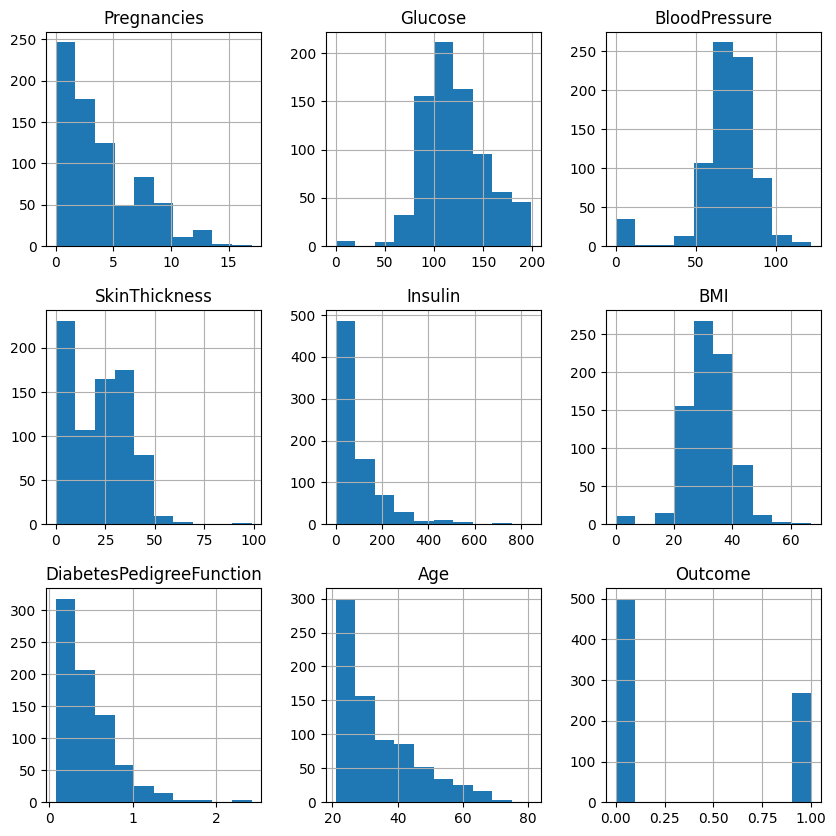

In [ ]:
data.hist(figsize=(10,10))

data=data.replace(0,data.mean())

In [ ]:
d_drop=data.drop(['Outcome','Pregnancies'],axis=1)

In [ ]:
d_drop.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33


In [ ]:
ddd=data.Outcome.head()
ddd.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
dd=ddd.to_frame()
dd.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [ ]:
dp=data.Pregnancies.head()
dp.head()

0    6
1    1
2    8
3    1
4    0
Name: Pregnancies, dtype: int64

In [ ]:
dp=dp.to_frame()
dp.head()

,Pregnancies
0,6
1,1
2,8
3,1
4,0


In [ ]:
d_drop=d_drop.replace(0,d_drop.mean())

In [ ]:
d_drop.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [ ]:
final_d = pd.concat([dp,d_drop, dd], axis=1, join='inner')
final_d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [ ]:
final_d.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

EXPLORATARY DATA ANALYSIS

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

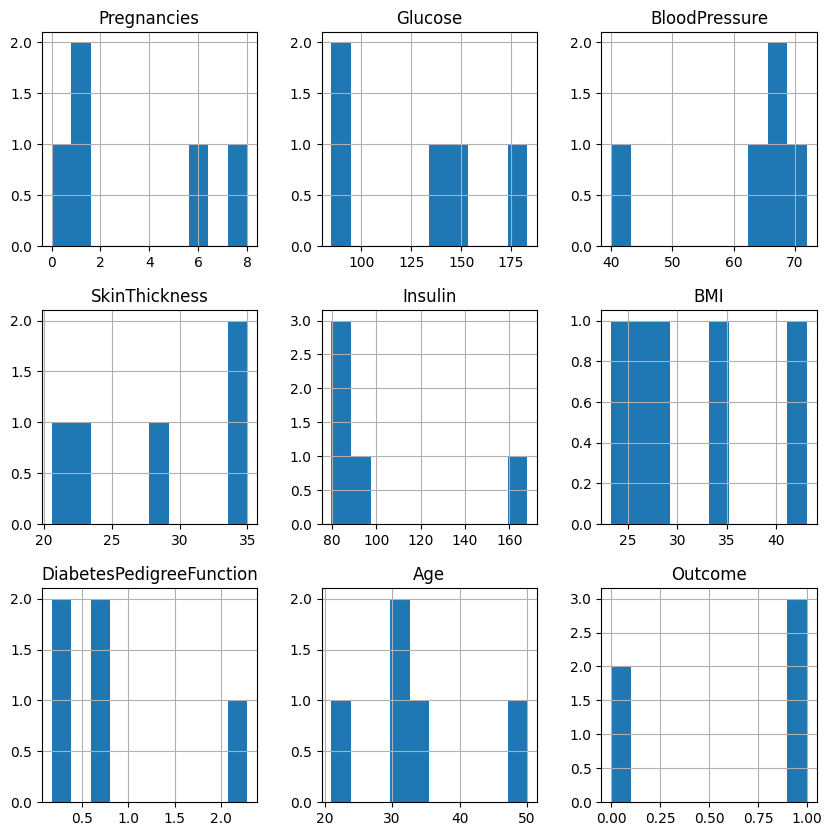

In [ ]:
final_d.hist(figsize=(10,10))

Axes(0.125,0.11;0.775x0.77)


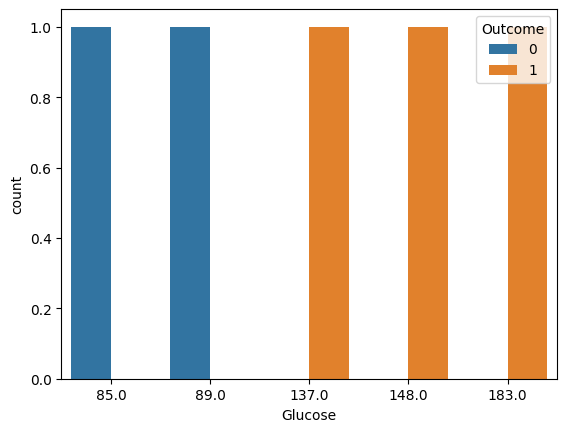

In [ ]:
#Plotting graphs between the positively correlated features
print(sns.countplot(data=final_d,x='Glucose',hue='Outcome'))

Above countplot clearly shows that above 130 mark glucose in a patient is diabetic.

Axes(0.125,0.11;0.775x0.77)


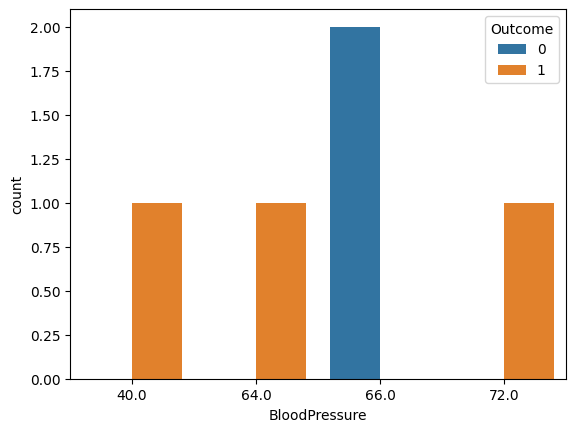

In [ ]:
print(sns.countplot(data=final_d,x='BloodPressure',hue='Outcome'))

Axes(0.125,0.11;0.775x0.77)


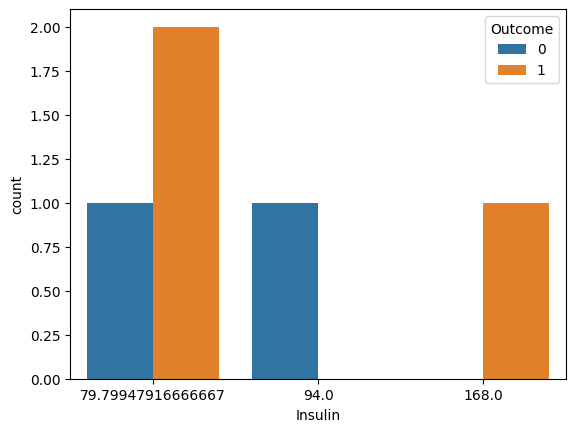

In [ ]:
print(sns.countplot(data=final_d,x='Insulin',hue='Outcome'))

Axes(0.125,0.11;0.775x0.77)


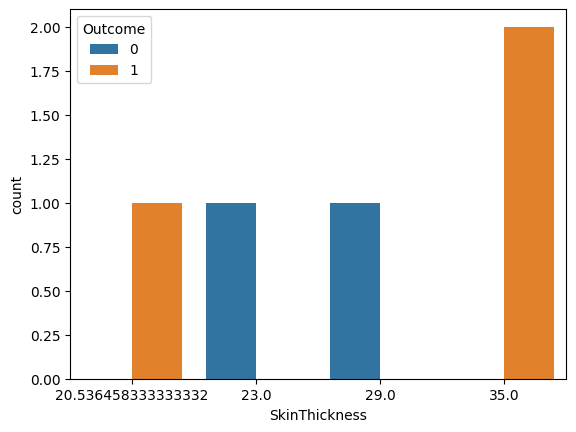

In [ ]:
print(sns.countplot(data=final_d,x='SkinThickness',hue='Outcome'))

Axes(0.125,0.11;0.775x0.77)


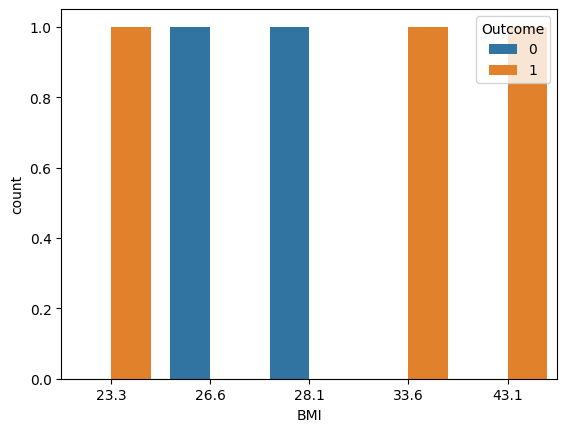

In [ ]:
print(sns.countplot(data=final_d,x='BMI',hue='Outcome'))

Axes(0.125,0.11;0.775x0.77)


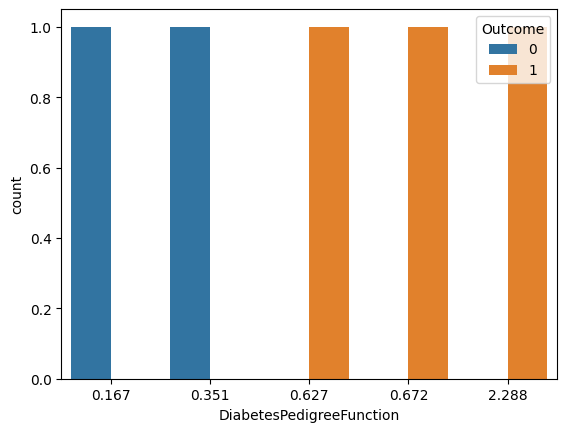

In [ ]:
print(sns.countplot(data=final_d,x='DiabetesPedigreeFunction',hue='Outcome'))

Diabetes pedigree function (DPF) calculates diabetes likelihood depending on the subject's age and his/her diabetic family history. Higherpeegreefunction  means the person is prone to diabetes.

Axes(0.125,0.11;0.775x0.77)


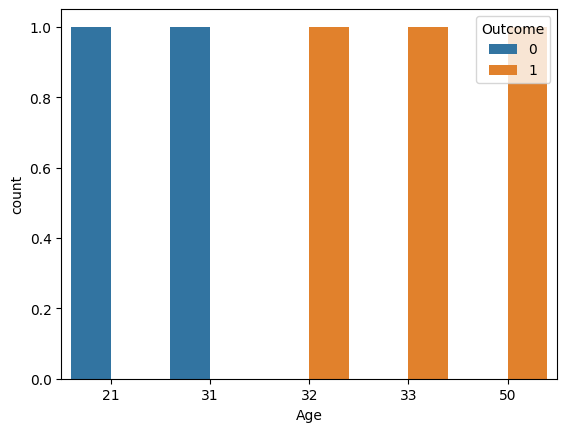

In [ ]:
print(sns.countplot(data=final_d,x='Age',hue='Outcome'))

Age above 30 are prone to diabtes.

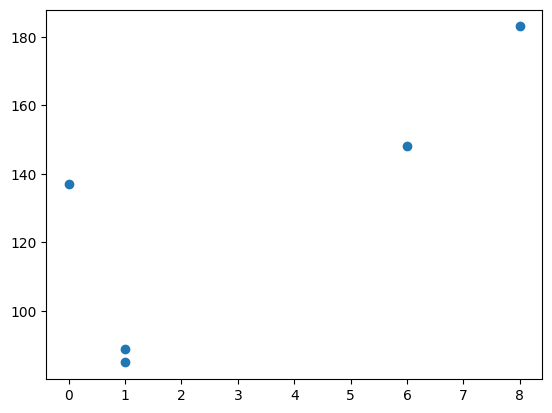

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(final_d['Pregnancies'],final_d['Glucose'])

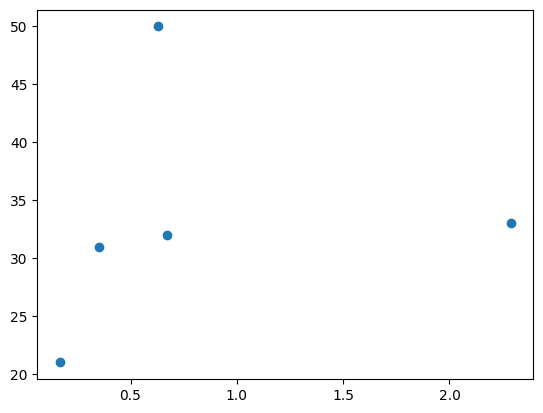

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(final_d['DiabetesPedigreeFunction'],final_d['Age'])

In [ ]:
final_d.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.797993,0.509708,-0.313278,-0.573394,-0.473810,-0.288684,0.493862,0.563547
Glucose,0.797993,1.000000,-0.104300,-0.051022,0.031292,0.030986,0.334031,0.483465,0.911585
BloodPressure,0.509708,-0.104300,1.000000,-0.342718,-0.965380,-0.738771,-0.926860,0.216797,-0.322832
SkinThickness,-0.313278,-0.051022,-0.342718,1.000000,0.482590,0.824171,0.567608,0.656835,0.342709
Insulin,-0.573394,0.031292,-0.965380,0.482590,1.000000,0.868227,0.925766,-0.131786,0.318468
BMI,-0.473810,0.030986,-0.738771,0.824171,0.868227,1.000000,0.852934,0.295061,0.422899
DiabetesPedigreeFunction,-0.288684,0.334031,-0.926860,0.567608,0.925766,0.852934,1.000000,0.159455,0.606669
Age,0.493862,0.483465,0.216797,0.656835,-0.131786,0.295061,0.159455,1.000000,0.646147
Outcome,0.563547,0.911585,-0.322832,0.342709,0.318468,0.422899,0.606669,0.646147,1.000000


<Axes: >

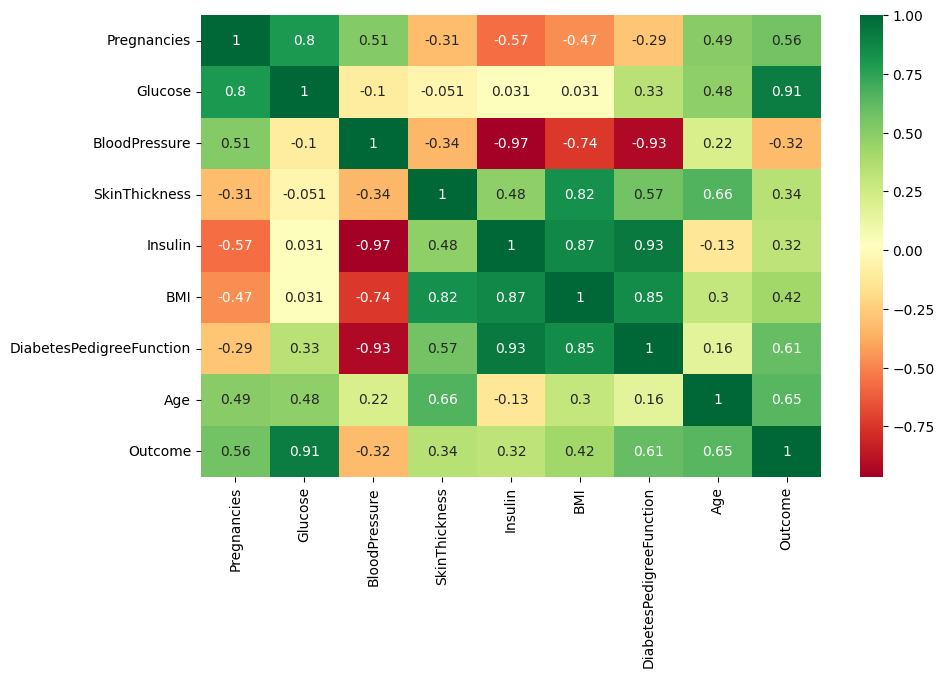

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(final_d.corr(),annot=True,cmap ='RdYlGn')

Bloodpressure and diabetespedigreefunctin hold negative correlation. also Insulin and Blood pressure. BMI and Bloodpressure are non-dependent to eachother.